**Movie Recommendation System**

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import *
sns.set_style('dark')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset into pandas datframe
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset.csv', sep = '\t', names = column_names)


In [ ]:
#printing the first few rows of the dataset
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
#Get the Movie Titles
movie_titles = pd.read_csv('movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
#Merge the loaded dataset with movie titles
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [ ]:
#Finding the highest rated titles in the dataset based on ratings
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Anna (1996)                               5.0
Prefontaine (1997)                        5.0
Boys, Les (1997)                          5.0
Maya Lin: A Strong Clear Vision (1994)    5.0
Delta of Venus (1994)                     5.0
Name: rating, dtype: float64

In [ ]:
#Identifying the most popular or frequently rated titles in the dataset
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             302
Contact (1997)               279
Fargo (1996)                 268
Scream (1996)                266
Return of the Jedi (1983)    259
Name: rating, dtype: int64

In [ ]:
#analyzing the average ratings of different titles in the dataset
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.500000
101 Dalmatians (1996),2.925926
12 Angry Men (1957),4.333333
187 (1997),2.900000


In [ ]:
#analyzing both the average ratings and the number of ratings for different titles in the dataset
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,6
1-900 (1994),2.500000,2
101 Dalmatians (1996),2.925926,54
12 Angry Men (1957),4.333333,66
187 (1997),2.900000,20


<Axes: >

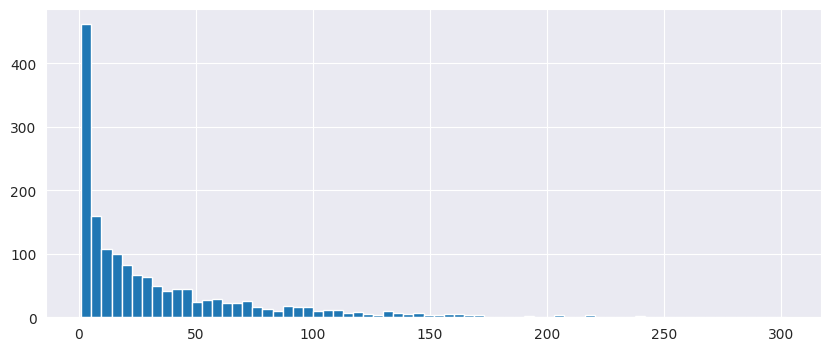

In [ ]:
#generating the histogram plot using the 'numOfRatings' column from the ratings DataFrame
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)

<Axes: >

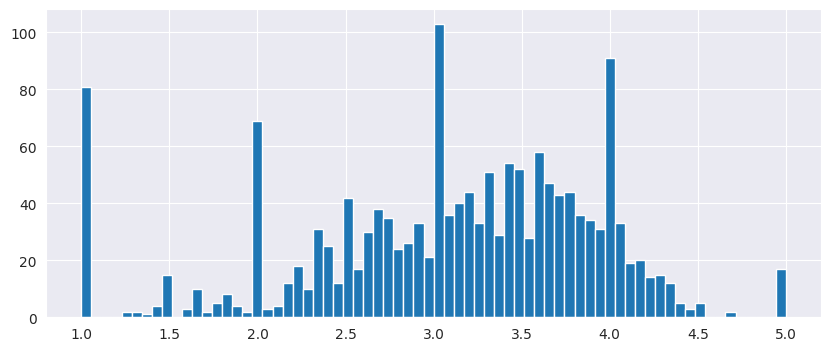

In [ ]:
#generates a histogram plot using the 'rating' column from the ratings DataFrame
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

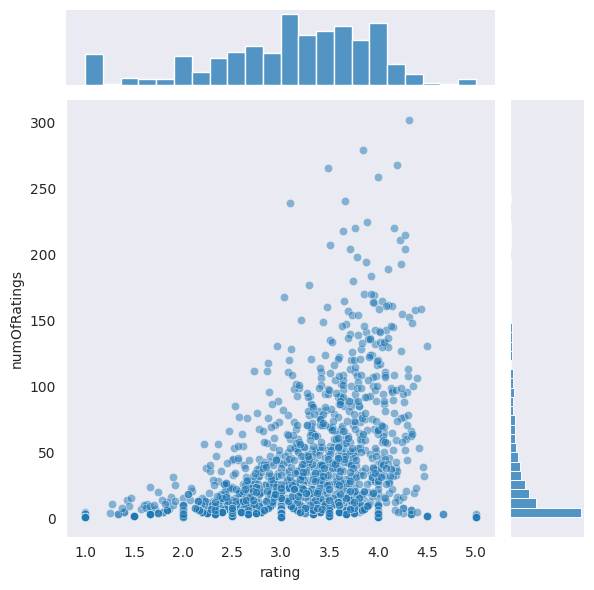

In [ ]:
#visualising the relationship between the average rating and the number of ratings for each title
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)

In [ ]:
#matrix like representation of user ratings for different movies
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,5.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.317881,302
Contact (1997),3.845878,279
Fargo (1996),4.190299,268
Scream (1996),3.488722,266
Return of the Jedi (1983),4.000000,259
"English Patient, The (1996)",3.659751,241
Liar Liar (1997),3.100418,239
Toy Story (1995),3.888889,225
Pulp Fiction (1994),4.159091,220


In [ ]:
# generating the movie recommendations based on the correlation values
for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]


'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
39 Steps, The (1935)
8 1/2 (1963)
8 Seconds (1994)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1996)
Alice in Wonderland (1951)
Alien (1979)
Alien 3 (1992)
Alien: Resurrection (1997)
Aliens (1986)
All About Eve (1950)
All Dogs Go to Heaven 2 (1

In [ ]:
#Checking the results
ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,6,Apollo 13 (1995),Star Wars (1977),Raiders of the Lost Ark (1981),Top Gun (1986)
1-900 (1994),2.500000,2,Psycho (1960),Apocalypse Now (1979),Babe (1995),Brazil (1985)
101 Dalmatians (1996),2.925926,54,Babe (1995),Heat (1995),Get Shorty (1995),Monty Python and the Holy Grail (1974)
12 Angry Men (1957),4.333333,66,Mars Attacks! (1996),When Harry Met Sally... (1989),Eraser (1996),Die Hard (1988)
187 (1997),2.900000,20,Unforgiven (1992),"Terminator, The (1984)",Indiana Jones and the Last Crusade (1989),Field of Dreams (1989)


In [ ]:
ratings = ratings.fillna('-')

In [ ]:
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

In [ ]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,6,Apollo 13 (1995),Star Wars (1977),Raiders of the Lost Ark (1981),Top Gun (1986)
1,1-900 (1994),2.500000,2,Psycho (1960),Apocalypse Now (1979),Babe (1995),Brazil (1985)
2,101 Dalmatians (1996),2.925926,54,Babe (1995),Heat (1995),Get Shorty (1995),Monty Python and the Holy Grail (1974)
3,12 Angry Men (1957),4.333333,66,Mars Attacks! (1996),When Harry Met Sally... (1989),Eraser (1996),Die Hard (1988)
4,187 (1997),2.900000,20,Unforgiven (1992),"Terminator, The (1984)",Indiana Jones and the Last Crusade (1989),Field of Dreams (1989)


In [ ]:
#Loading all the movie names
for i in df_result['title']:
    print(i)

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1996)
Alice in Wonderland (1951)

**Recommendations**

In [ ]:
# Taking the input from the user and retriving the movie recommendations for the same
from IPython.display import clear_output

inputMovieName = widgets.Text()

def getRecommendations(sender):
    clear_output(wait=True)  # Clear output after pressing enter
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]

    if not list_result.empty:
        fm = list_result['FirstMovieRecommendation'].values
        sm = list_result['SecondMovieRecommendation'].values
        tm = list_result['ThirdMovieRecommendation'].values
        fourthm = list_result['FourthMovieRecommendation'].values

        if len(fm) > 0 and len(sm) > 0 and len(tm) > 0 and len(fourthm) > 0:
            finalRecommendationText = '1:' + fm[0] + ' \n2:' + sm[0] + ' \n3:' + tm[0] + ' \n4:' + fourthm[0]
            print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
            print(finalRecommendationText)
        else:
            print('Sorry, the movie ' + searchMovie + ' does not have complete recommendations.')
    else:
        print('Sorry, the movie ' + searchMovie + ' was not found.')



In [ ]:
inputMovieName.on_submit(getRecommendations)
inputMovieName


Your Recommendations for the Movie Wishmaster (1997) are:

1:Hunt for Red October, The (1990) 
2:Boogie Nights (1997) 
3:Toy Story (1995) 
4:Rock, The (1996)
